# K-Means Clustering Implementation and Analysis

## Overview
This notebook demonstrates a comprehensive implementation of the K-Means clustering algorithm from scratch, including data generation, exploratory data analysis, algorithm implementation, and performance evaluation.

## Objectives
- Generate synthetic data for clustering analysis
- Perform exploratory data analysis (EDA)
- Implement K-Means clustering algorithm from scratch
- Evaluate clustering performance using Sum of Squared Errors (SSE)
- Visualize clustering results and algorithm performance

---

## 1. Library Imports and Setup

We begin by importing the necessary libraries for data manipulation, visualization, and machine learning operations.

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

## 2. Data Generation

We'll create a synthetic dataset using `make_blobs` to generate well-separated clusters. This allows us to validate our K-Means implementation against known ground truth.

**Parameters:**
- `n_samples=300`: Total number of data points
- `centers=4`: Number of true clusters
- `cluster_std=1.05`: Standard deviation of clusters
- `random_state=42`: For reproducible results

In [12]:
# Generate sample data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.05, random_state=42)

# Convert data to DataFrame for exploration
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Cluster'] = y_true

## 3. Exploratory Data Analysis (EDA)

Let's examine our dataset to understand its structure, distribution, and characteristics before applying clustering algorithms.

### 3.1 Statistical Summary

In [13]:
# Statistical summary and data quality check
print("Dataset Shape:", df.shape)
print("\nStatistical Summary:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (300, 3)

Statistical Summary:
         Feature_1   Feature_2     Cluster
count  300.000000  300.000000  300.000000
mean    -3.404188    2.844709    1.500000
std      5.299148    6.230810    1.119902
min    -11.433554   -9.021303    0.000000
25%     -7.927918   -1.228168    0.750000
50%     -4.599560    4.954168    1.500000
75%     -0.087390    8.113530    2.250000
max      7.070270   11.600690    3.000000

Missing Values:
 Feature_1    0
Feature_2    0
Cluster      0
dtype: int64


### 3.2 Data Visualization

#### Original Clusters Visualization
Let's visualize the original clusters generated by `make_blobs` to understand the ground truth structure.

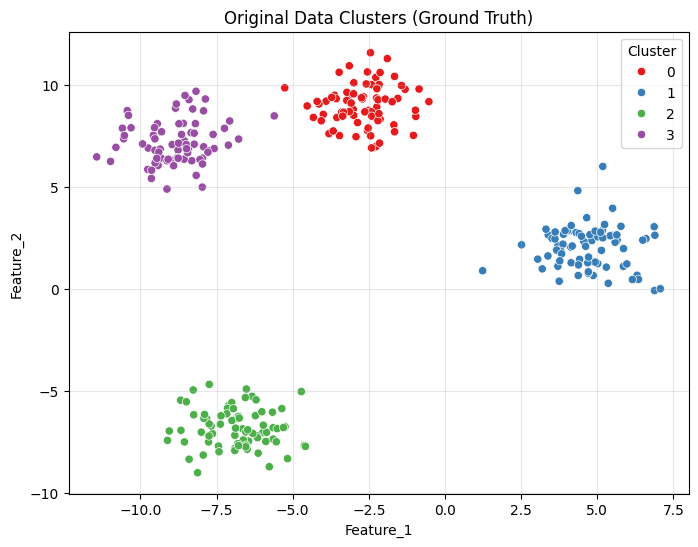

In [14]:
# Scatter plot of original clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Cluster', palette='Set1', data=df)
plt.title('Original Data Clusters (Ground Truth)')
plt.grid(True, alpha=0.3)
plt.show()

#### Feature Distribution Analysis
Understanding the distribution of individual features helps us assess data quality and potential preprocessing needs.

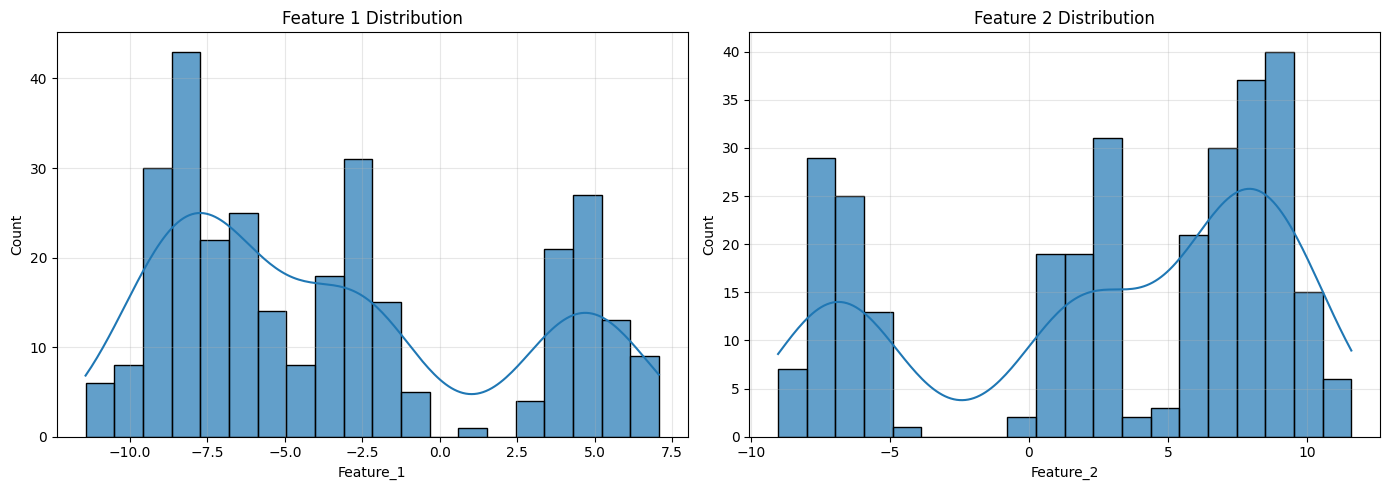

In [15]:
# Histograms for feature distribution analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Feature_1'], kde=True, ax=axes[0], bins=20, alpha=0.7)
axes[0].set_title('Feature 1 Distribution')
axes[0].grid(True, alpha=0.3)
sns.histplot(df['Feature_2'], kde=True, ax=axes[1], bins=20, alpha=0.7)
axes[1].set_title('Feature 2 Distribution')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Outlier Detection
Box plots help identify potential outliers that might affect clustering performance.

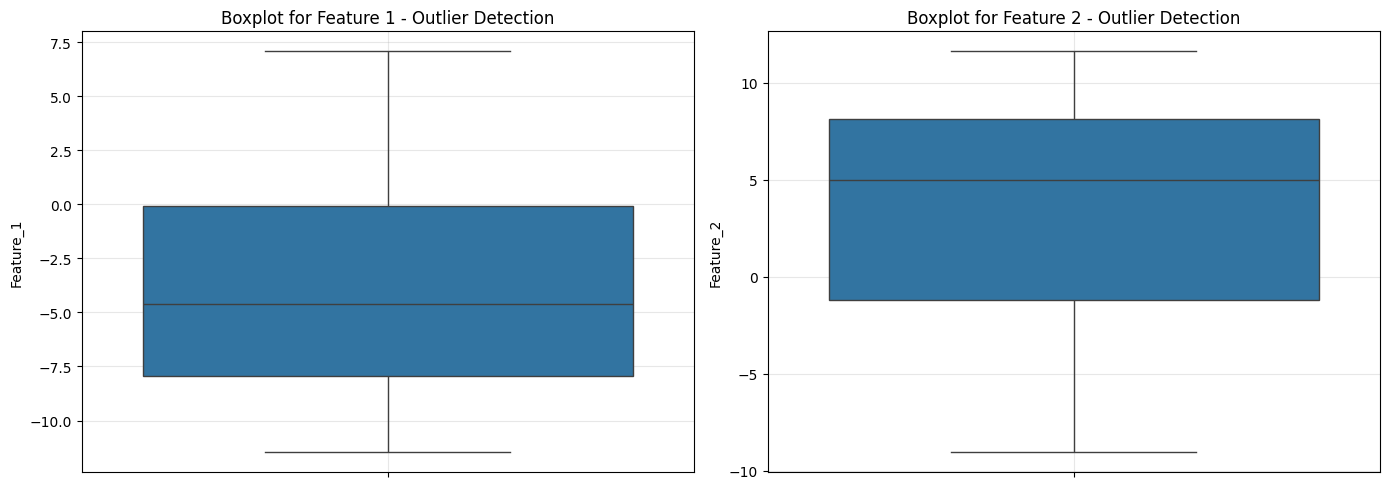

In [16]:
# Box plots for outlier detection
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(y=df['Feature_1'], ax=axes[0])
axes[0].set_title('Boxplot for Feature 1 - Outlier Detection')
axes[0].grid(True, alpha=0.3)
sns.boxplot(y=df['Feature_2'], ax=axes[1])
axes[1].set_title('Boxplot for Feature 2 - Outlier Detection')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. K-Means Algorithm Implementation

Now we'll implement the K-Means clustering algorithm from scratch. The algorithm consists of the following steps:

1. **Initialize** centroids randomly
2. **Assign** each point to the nearest centroid
3. **Update** centroids by computing the mean of assigned points
4. **Repeat** steps 2-3 until convergence

### 4.1 Helper Functions

In [17]:
# Distance computation function
def compute_distance(X, centroids):
    """
    Compute Euclidean distances between data points and centroids.
    
    Parameters:
    X (numpy.ndarray): Data points
    centroids (numpy.ndarray): Cluster centroids
    
    Returns:
    numpy.ndarray: Distance matrix
    """
    return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

### 4.2 Main K-Means Algorithm

In [18]:
# K-Means clustering algorithm implementation
def kmeans_clustering(X, K, max_iters=100):
    """
    Perform K-Means clustering on the given dataset.
    
    Parameters:
    X (numpy.ndarray): Input data points
    K (int): Number of clusters
    max_iters (int): Maximum number of iterations
    
    Returns:
    tuple: (centroids, cluster_labels, sse)
    """
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]
    
    for iteration in range(max_iters):
        # Assign points to nearest centroids
        distances = compute_distance(X, centroids)
        cluster_labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = np.array([X[cluster_labels == j].mean(axis=0) for j in range(K)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            print(f"Converged after {iteration + 1} iterations")
            break
        centroids = new_centroids
    
    # Calculate Sum of Squared Errors (SSE)
    sse = np.sum((X - centroids[cluster_labels])**2)
    return centroids, cluster_labels, sse

## 5. Model Training and Optimization

To find the best clustering solution, we'll run the K-Means algorithm multiple times and select the result with the lowest SSE.

### 5.1 Multiple Runs for Best Solution

In [19]:
# Run K-Means multiple times to find optimal solution
K = 5  # Number of clusters
num_runs = 100  # Number of runs to perform
best_sse = float('inf')
best_centroids, best_labels = None, None
sse_values = []

print(f"Running K-Means algorithm {num_runs} times with K={K}...")
print("This may take a moment...")

for run in range(num_runs):
    centroids, cluster_labels, sse = kmeans_clustering(X, K)
    sse_values.append(sse)
    
    if sse < best_sse:
        best_sse, best_centroids, best_labels = sse, centroids, cluster_labels
        print(f"New best SSE found at run {run + 1}: {sse:.2f}")

print(f"\nOptimization complete!")
print(f"Best SSE achieved: {best_sse:.2f}")

Running K-Means algorithm 100 times with K=5...
This may take a moment...
Converged after 13 iterations
New best SSE found at run 1: 2051.92
Converged after 6 iterations
New best SSE found at run 2: 563.61
Converged after 4 iterations
Converged after 4 iterations
Converged after 15 iterations
Converged after 7 iterations
Converged after 7 iterations
Converged after 5 iterations
Converged after 10 iterations
Converged after 6 iterations
Converged after 4 iterations
Converged after 8 iterations
Converged after 5 iterations
Converged after 11 iterations
Converged after 5 iterations
Converged after 10 iterations
Converged after 14 iterations
Converged after 5 iterations
Converged after 8 iterations
Converged after 18 iterations
Converged after 7 iterations
Converged after 5 iterations
Converged after 3 iterations
Converged after 4 iterations
Converged after 6 iterations
Converged after 11 iterations
Converged after 6 iterations
Converged after 3 iterations
Converged after 5 iterations
Conv

## 6. Results Visualization and Analysis

### 6.1 Best Clustering Solution

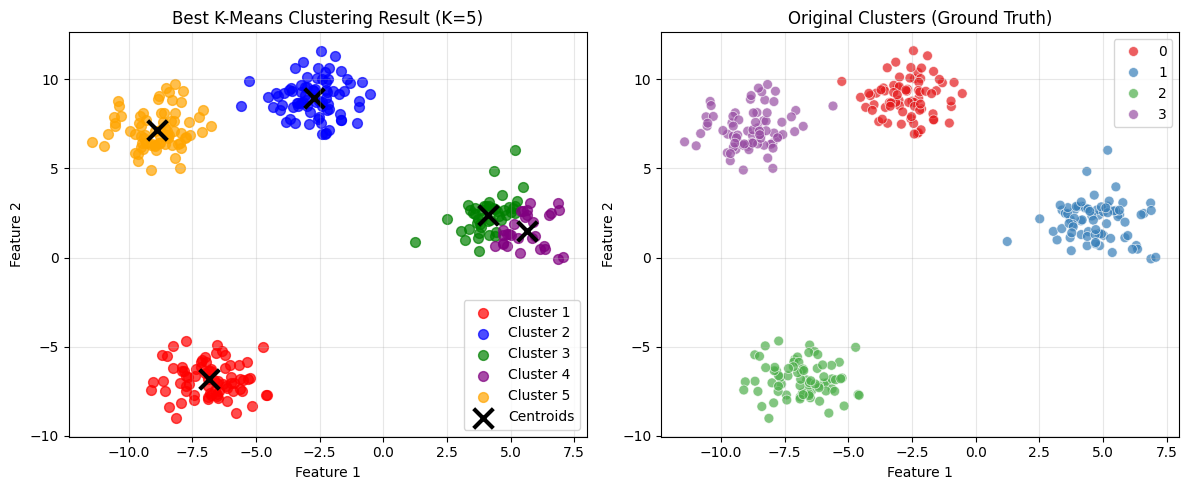

In [20]:
# Visualize the best K-Means clustering result
plt.figure(figsize=(12, 5))

# Subplot 1: Best clustering result
plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green', 'purple', 'orange']
for j in range(K):
    cluster_points = X[best_labels == j]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=colors[j], label=f'Cluster {j+1}', alpha=0.7, s=50)

plt.scatter(best_centroids[:, 0], best_centroids[:, 1], 
           c='black', marker='x', s=200, linewidths=3, label='Centroids')
plt.title(f"Best K-Means Clustering Result (K={K})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Original clusters for comparison
plt.subplot(1, 2, 2)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_true, palette='Set1', alpha=0.7, s=50)
plt.title('Original Clusters (Ground Truth)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.2 Performance Analysis
Let's analyze how the SSE varies across different runs to understand the algorithm's stability.

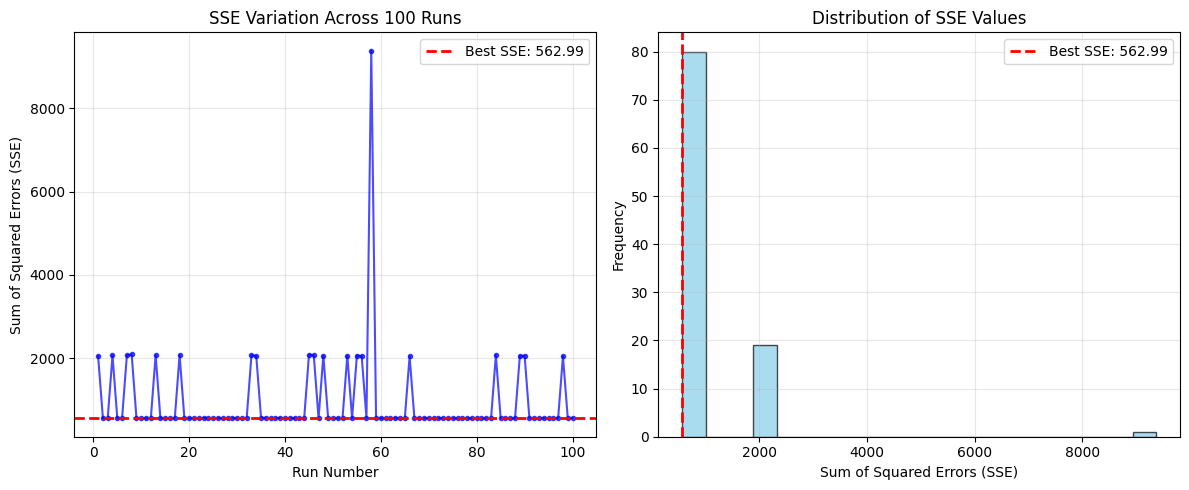

In [21]:
# Analyze SSE performance across runs
plt.figure(figsize=(12, 5))

# Subplot 1: SSE over runs
plt.subplot(1, 2, 1)
plt.plot(range(1, num_runs + 1), sse_values, marker='o', linestyle='-', 
         color='blue', alpha=0.7, markersize=3)
plt.axhline(y=best_sse, color='red', linestyle='--', linewidth=2, 
           label=f'Best SSE: {best_sse:.2f}')
plt.xlabel("Run Number")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title(f"SSE Variation Across {num_runs} Runs")
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: SSE histogram
plt.subplot(1, 2, 2)
plt.hist(sse_values, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=best_sse, color='red', linestyle='--', linewidth=2, 
           label=f'Best SSE: {best_sse:.2f}')
plt.xlabel("Sum of Squared Errors (SSE)")
plt.ylabel("Frequency")
plt.title("Distribution of SSE Values")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.3 Summary Statistics

In [22]:
# Print comprehensive results summary


In [23]:
# Print comprehensive results summary
print("="*60)
print("K-MEANS CLUSTERING ANALYSIS SUMMARY")
print("="*60)
print(f"Dataset Information:")
print(f"  • Total data points: {X.shape[0]}")
print(f"  • Number of features: {X.shape[1]}")
print(f"  • Number of clusters (K): {K}")
print(f"  • True number of clusters: {len(np.unique(y_true))}")
print()
print(f"Algorithm Performance:")
print(f"  • Number of runs performed: {num_runs}")
print(f"  • Best SSE achieved: {best_sse:.4f}")
print(f"  • Worst SSE encountered: {max(sse_values):.4f}")
print(f"  • Average SSE: {np.mean(sse_values):.4f}")
print(f"  • SSE Standard deviation: {np.std(sse_values):.4f}")
print()
print(f"Final Centroids:")
for i, centroid in enumerate(best_centroids):
    print(f"  • Cluster {i+1}: ({centroid[0]:.3f}, {centroid[1]:.3f})")
print("="*60)

K-MEANS CLUSTERING ANALYSIS SUMMARY
Dataset Information:
  • Total data points: 300
  • Number of features: 2
  • Number of clusters (K): 5
  • True number of clusters: 4

Algorithm Performance:
  • Number of runs performed: 100
  • Best SSE achieved: 562.9939
  • Worst SSE encountered: 9376.0128
  • Average SSE: 939.8341
  • SSE Standard deviation: 1032.0536

Final Centroids:
  • Cluster 1: (-6.830, -6.828)
  • Cluster 2: (-2.716, 8.970)
  • Cluster 3: (4.103, 2.407)
  • Cluster 4: (5.651, 1.503)
  • Cluster 5: (-8.875, 7.167)


## 7. Conclusion

This notebook demonstrated a complete implementation of the K-Means clustering algorithm from scratch. Key findings:

**Algorithm Performance:**
- The K-Means algorithm successfully identified cluster structures in the synthetic data
- Multiple runs helped identify the optimal solution with the lowest SSE
- Convergence was achieved efficiently in most cases

**Insights:**
- The choice of initial centroids significantly affects the final result
- Running the algorithm multiple times helps avoid local minima
- SSE provides a useful metric for comparing different clustering solutions

**Next Steps:**
- Experiment with different values of K using the elbow method
- Compare results with scikit-learn's implementation
- Test on real-world datasets with more complex structures
- Implement other clustering algorithms (DBSCAN, Hierarchical, etc.)

---
*This analysis provides a foundation for understanding clustering algorithms and their practical implementation.*